<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://github.com/practicaldl/Practical-Deep-Learning-Book/blob/master/code/chapter-2/2-what-does-my-neural-network-think.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This code is part of [Chapter 2 - What’s in the Picture: Image Classification with Keras](https://learning.oreilly.com/library/view/practical-deep-learning/9781492034858/ch02.html). This notebook will not run on Colab. For Colab, use <a target="_blank" href="https://github.com/practicaldl/Practical-Deep-Learning-Book/blob/master/code/chapter-2/2-colab-what-does-my-neural-network-think.ipynb">chapter-2/2-colab-what-does-my-neural-network-think.ipynb</a> instead.

# What Does My Neural Network Think?

In this code sample, we try to understand why the neural network made a particular prediction. We use visualization (a heatmap) to understand the decision-making that is going on within the network. Using color, we visually identify the areas within an image that prompted a decision. “Hot” spots, represented by warmer colors (red, orange, and yellow) highlight the areas with the maximum signal, whereas cooler colors (blue, purple) indicate low signal.

The `visualization.py` script produces the heatmap for one or more input images, overlays it on the image, and stitches it side-by-side with the original image for comparison. The script accepts arguments for image path or a directory that contains frames of a video.

## Visualizing the Heatmap of an Image

In [1]:
!pip install tensorflow==2.0.0 tf-explain==0.1.0 pathlib matplotlib numpy pillow -U

     |████████████████████████████████| 86.3 MB 46 kB/s s eta 0:00:01K     |▌                               | 1.3 MB 11.9 MB/s eta 0:00:08
  Using cached pathlib-1.0.1-py3-none-any.whl
  Using cached numpy-1.20.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.3 MB)
     |████████████████████████████████| 50 kB 851 kB/s  eta 0:00:01
     |████████████████████████████████| 449 kB 60.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 62.2 MB/s eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7538 sha256=d2701d860c50036dde93b83a104f035928289c166b0e3aecd52bbbbb8f91778a
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorfl

In [2]:
!python visualization.py --process image --path ../../sample-images/dog.jpg

2021-06-11 14:40:45.911688: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2021-06-11 14:40:45.917034: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2499995000 Hz
2021-06-11 14:40:45.917257: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x564c08babd20 executing computations on platform Host. Devices:
2021-06-11 14:40:45.917295: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
2021-06-11 14:40:46.251372: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 411041792 exceeds 10% of system memory.
2021-06-11 14:40:46.904285: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 411041792 exceeds 10% of system memory.
2021-06-11 14:40:47.139975: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 411041792 exceeds 10% of system memory.
2021-06-11 

![t](./data/dog-output.jpg)
The right half of the image indicates the “areas of heat” along with the correct prediction of a 'Cardigan Welsh Corgi'.

Note: As we can see below, the label is different from the labels shown in the book. This is because we use the [VGG-19](http://www.robots.ox.ac.uk/~vgg/research/very_deep/) model in the visualization script, whereas we used the [ResNet-50](https://github.com/KaimingHe/deep-residual-networks) model in the book.

![t](./data/cat-output.jpg)

## Visualizing the Heatmap of a Video

Before we can run the `visualization.py` script, we will need to use `ffmpeg` to split up a video into individual frames. Let's create a directory to store these frames and pass its name as an argument into the `ffmpeg` command.

In [3]:
!mkdir kitchen

mkdir: cannot create directory ‘kitchen’: File exists


In [4]:
!ffmpeg -i kitchen-input.mov -vf fps=25 data/kitchen/thumb%04d.jpg -hide_banner

/bin/sh: 1: ffmpeg: not found


Now let's run the `visualization.py` script with the path of the directory containing the frames.

In [5]:
!python visualization.py --process video --path data/kitchen/

2021-06-11 14:42:25.333113: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2021-06-11 14:42:25.340466: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2499995000 Hz
2021-06-11 14:42:25.340790: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55a92e3ba8c0 executing computations on platform Host. Devices:
2021-06-11 14:42:25.340917: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
2021-06-11 14:42:25.614222: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 411041792 exceeds 10% of system memory.
2021-06-11 14:42:26.250113: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 411041792 exceeds 10% of system memory.
2021-06-11 14:42:26.458106: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 411041792 exceeds 10% of system memory.
2021-06-11 

Compile a video from those frames using ffmpeg:

In [12]:
# !pwd

In [11]:
# !../../ffmpeg-git-20210528-amd64-static/ffmpeg -h

In [13]:
!../../ffmpeg-git-20210528-amd64-static/ffmpeg -framerate 25 -i data/kitchen_output/result-%04d.jpg kitchen-output.mp4

ffmpeg version N-57631-gebedd26eef-static https://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gmp --enable-libgme --enable-gray --enable-libaom --enable-libfribidi --enable-libass --enable-libvmaf --enable-libfreetype --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-librubberband --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libvorbis --enable-libopus --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libdav1d --enable-libxvid --enable-libzvbi --enable-libzimg
  libavutil      57.  0.100 / 57.  0.100
  libavcodec     59.  1.100 / 59.  1.100
  

[![Heatmap Demo Video](./data/kitchen-output/result_0001.jpg)](https://youtu.be/DhMzvbYjkUY "Chapter 2 - Heatmap Demo")

Perfect! Imagine generating heatmaps to analyze the strong points and shortfalls of your trained model or a pretrained model. Don't forget to post your videos on Twitter with the hashtag [#PracticalDL](https://twitter.com/hashtag/PracticalDL)!

In [14]:
# !pip install tf_explain

In [15]:
!python visualization.py --process image --path catko.jpg

2021-06-11 15:09:21.277896: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2021-06-11 15:09:21.283613: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2499995000 Hz
2021-06-11 15:09:21.283981: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5618700442f0 executing computations on platform Host. Devices:
2021-06-11 15:09:21.284059: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
2021-06-11 15:09:21.551951: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 411041792 exceeds 10% of system memory.
2021-06-11 15:09:22.156253: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 411041792 exceeds 10% of system memory.
2021-06-11 15:09:22.349882: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 411041792 exceeds 10% of system memory.
2021-06-11 

In [2]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import get_file

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tf_explain.core.grad_cam import GradCAM

import PIL
from PIL import Image, ImageDraw, ImageFont

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

from argparse import ArgumentParser

import glob
import os

#Select a model to use, in this case VGG16
model = VGG16(weights='imagenet', include_top=True, input_tensor=None, input_shape=None, pooling=None, classes=1000)
#Check with 'print(model.summary())', in this case it is "block5_conv3"
print(model.summary())
last_conv_layer_name = "block5_conv3"
#Must include layers between last convolutional layer and prediction layer
#Layer names can be found through 'print(model.summary())'
classifier_layer_names = ["block5_pool", "flatten", "fc1", "fc2", "predictions"]

#This function is called from 'make_gradcam_heatmap'
#Takes iaage_path from 'get_command_line_arguments', turns into it an array
def get_img_array(img_path, size):
    img = tensorflow.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    # `array` is a float32 Numpy array
    array = tensorflow.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array

#'make_gradcam_heatmap' is main function and ultimately returns heatmap superimposed onto the input image(s)

#inputs are the image path specified in the command line, the last convolutional layer and
#the classifier layer names of which both are defined above and depend on your model, and the output path
#for our heatmap superimposed onto original image which are specified in the script's final if statement
def make_gradcam_heatmap(
    img_path, model, last_conv_layer_name, classifier_layer_names, output_path
):
    #pre_processes the array returned from 'get_img_array'
    img_array = preprocess_input(get_img_array(img_path, size= (224, 224)))

    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = tensorflow.keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = tensorflow.keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = tensorflow.keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tensorflow.GradientTape() as tape:

        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)

        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tensorflow.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]
#         print("=----")
#         print(preds)
#         print("-----")
#         print(top_class_channel)

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tensorflow.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    # We load the original image
    img = tensorflow.keras.preprocessing.image.load_img(img_path)
    img = tensorflow.keras.preprocessing.image.img_to_array(img)

    # We rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # We use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # We use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # We create an image with RGB colorized heatmap
    jet_heatmap = tensorflow.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tensorflow.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * 0.4 + img
    superimposed_img = tensorflow.keras.preprocessing.image.array_to_img(superimposed_img)

    #Save the the superimposed image to the output path
    print('Save the the superimposed image to the output path')
    print(output_path)
    superimposed_img.save(output_path)

#Runs body of code for entirety of videoframs_path (folder specified in command line)
def process_video(videoframes_path, output_prefix):
    counter = 0
    #define output directory
    output_dir = output_prefix + "_output"

    #Creates directory output directoy if it doesn't already exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for input_path in sorted(glob.glob(videoframes_path + "/*.jpg")):
        counter += 1

        output_path = output_dir + "/result-" + str(counter).zfill(4) + '.jpg'

        #Runs main function with specified image_path, output_prefix, and layers defined near top of script
        make_gradcam_heatmap(input_path, model, last_conv_layer_name, classifier_layer_names, output_path)

# #Function for taking inputs through the command line
# def get_command_line_arguments():
#     parser = ArgumentParser()
#     #We specify either image or video to
#     parser.add_argument("--process", choices=["image", "video"], required=True,
#                         dest="process_type", help="Process a single image or video")
#     parser.add_argument("--path", required=True, dest="path",
#                         help="Path of image or directory containing video frames")
#     return parser.parse_args()


# args = get_command_line_arguments()

# #If process is specified as 'image', defines image_path and output_prefix according to command line argument
# if args.process_type == "image":
#     #image path is location of image that we want to generate a heatmap for
#     image_path = args.path
#     output_prefix = os.path.splitext(os.path.basename(image_path))[0]
#     #Runs main function with specified image_path and output_prefix from command line
#     #layers defined near top of script
#     make_gradcam_heatmap(image_path, model, last_conv_layer_name, classifier_layer_names, output_prefix + "_output.jpg")

#     #Plot the superimposed image
#     img = mpimg.imread(output_prefix + "_output.jpg")
#     print('Plotting ...')
#     plt.imshow(img)
#     plt.show()

# #If process is specified as 'image', defines videoframes_path and output_prefix according to command line argument
# elif args.process_type == "video":
#     #videoframes_path is directory with the video frames split by ffmpeg
#     videoframes_path = args.path
#     #will be used to specify or create output folder
#     output_prefix = os.path.dirname(videoframes_path)
#     #Runs 'process_video' function with inputs taken from command line
#     heatmaps = process_video(videoframes_path, output_prefix)


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Save the the superimposed image to the output path
salamander_output.jpg
Plotting ...


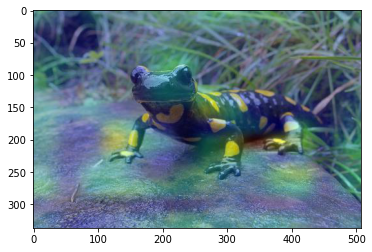

In [3]:
# !python visualization.py --process image --path catko.jpg
#image path is location of image that we want to generate a heatmap for
image_path = 'salamander.jpg'
output_prefix = os.path.splitext(os.path.basename(image_path))[0]
#Runs main function with specified image_path and output_prefix from command line
#layers defined near top of script
make_gradcam_heatmap(image_path, model, last_conv_layer_name, classifier_layer_names, output_prefix + "_output.jpg")

#Plot the superimposed image
img = mpimg.imread(output_prefix + "_output.jpg")
print('Plotting ...')
plt.imshow(img)
plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def predict(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    model = tf.keras.applications.resnet50.ResNet50()
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = model.predict(img_preprocessed)
    print(decode_predictions(prediction, top=3)[0])

In [7]:
predict(image_path)

[('n01629819', 'European_fire_salamander', 0.97942734), ('n01632458', 'spotted_salamander', 0.019697808), ('n01630670', 'common_newt', 0.0006345009)]


In [5]:
!python visualization.py --process image --path ../../sample-images/shark.jpg

2021-06-11 15:45:54.765984: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2021-06-11 15:45:54.787208: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2499995000 Hz
2021-06-11 15:45:54.787538: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55a4846c7c90 executing computations on platform Host. Devices:
2021-06-11 15:45:54.787577: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
2021-06-11 15:45:55.094551: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 411041792 exceeds 10% of system memory.
2021-06-11 15:45:55.695718: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 411041792 exceeds 10% of system memory.
Killed
